In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
import random
import pickle
from scipy.interpolate import make_interp_spline, BSpline

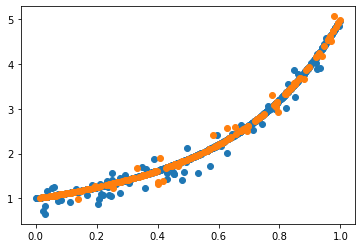

In [10]:
dt = pd.read_pickle('train_dataset.pickle')
td = np.load("test_dataset.pickle", allow_pickle=True)
xtest = np.array([t[0] for t in td]).reshape(-1,1)
ytest = np.array([t[1] for t in td]).reshape(-1,1)
np.random.shuffle(dt)
x = dt[:800,0]
y = dt[:800,1]
plt.scatter(dt[:800,0],dt[:800,1])  #blue
plt.scatter(xtest, ytest)           #orange

In [11]:
X = []
Y = []
for i in range(20):
    xx = []
    yy = []
    for j in range(40):
        xx.append(x[i*40+j])
        yy.append(y[i*40+j])
    X.append(xx)
    Y.append(yy)
X = np.array(X)
Y = np.array(Y)
print(dt.shape)
print(td.shape)
print(X.shape)
print(Y.shape)
print(xtest.shape)
print(ytest.shape)

(800, 2)
(200, 2)
(20, 40)
(20, 40)
(200, 1)
(200, 1)


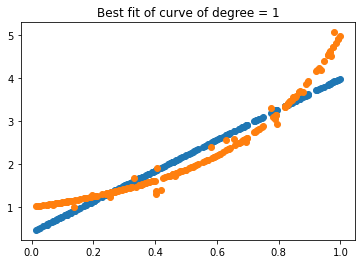

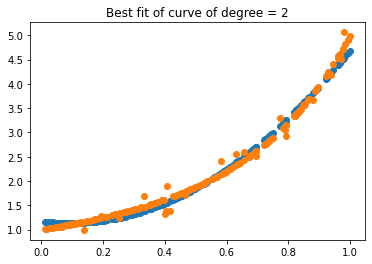

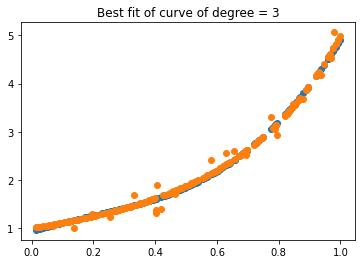

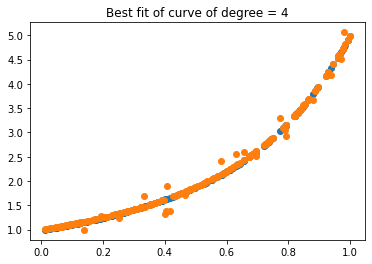

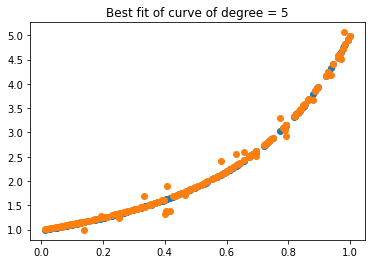

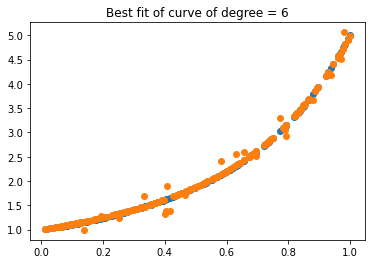

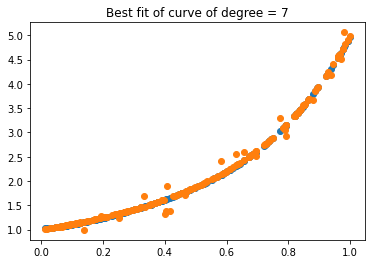

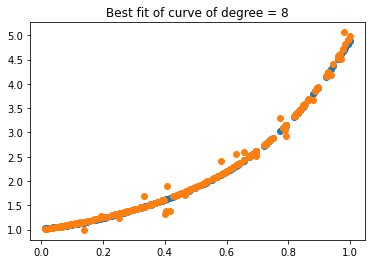

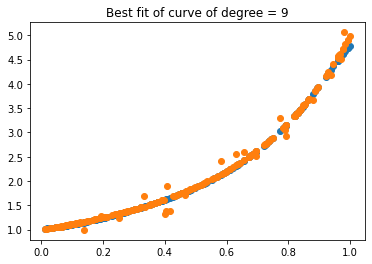

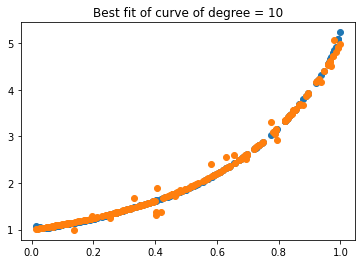

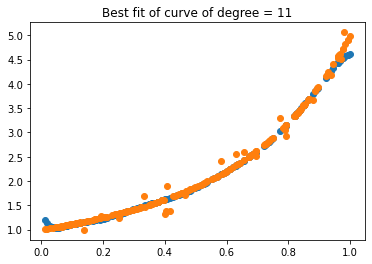

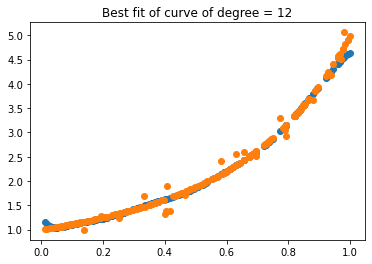

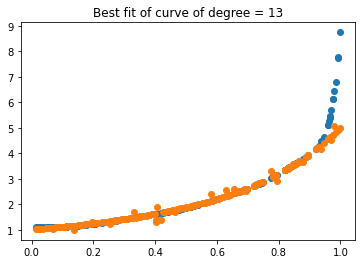

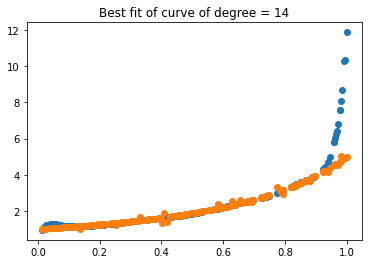

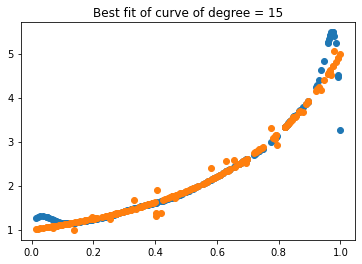

In [12]:
bias = []
var = []
biassq = []
mse = []
for i in range(1,16):
    pred = []
    ms = []
    sum = 0
    p = PolynomialFeatures(degree=i, include_bias=False)
    for j in range(20):
        ptrain = p.fit_transform(X[j].reshape(40,1))
        ptest = p.transform(xtest.reshape(200,1))
        model = LinearRegression().fit(ptrain, Y[j])
        yyy = model.predict(ptest)
        pred.append(yyy)
        s = 0
        for k in range(200):
            s = s + ((yyy[k] - ytest[k])**2)
        sum = sum + s
    sum = sum/4000
    mse.append(sum)
    pred = np.array(pred)
    vary = np.var(pred, axis=0)
    v = np.sum(vary)/200
    var.append(v)
    avg = np.mean(pred, axis=0)
    avg = np.array(avg)
    #########################################
    #bias.append(np.mean(abs(avg - ytest)))
    # print(avg[0])
    # mse.append(np.mean(np.mean((avg - ytest)**2))
    s = 0
    for k in range(200):
        s = s + abs(avg[k] - ytest[k])
    s = s/200
    bias.append(s)
    s = 0
    for k in range(200):
        s = s + (abs(avg[k] - ytest[k])**2)
    s = s/200
    biassq.append(s)
    plt.figure(i)
    plt.scatter(xtest,avg)                   # blue our guessed points
    plt.scatter(xtest,ytest)                 # orange the given data points
    plt.title("Best fit of curve of degree = "+ str(i))

In [13]:
bias = np.array(bias).reshape(15)
biassq = np.array(biassq).reshape(15)
var = np.array(var).reshape(15)
mse = np.array(mse).reshape(15)
tbl = {
    'Degree' : range(1,16),
    'MSE' : mse,
    'Mean of bias square' : biassq,
    'Mean of bias' : bias,
    'Mean of variance': var
}
print(tabulate(tbl,headers='keys',tablefmt='fancy_outline'))

╒══════════╤═════════════╤═══════════════════════╤════════════════╤════════════════════╕
│   Degree │         MSE │   Mean of bias square │   Mean of bias │   Mean of variance │
╞══════════╪═════════════╪═══════════════════════╪════════════════╪════════════════════╡
│        1 │  0.123716   │            0.114399   │      0.269405  │        0.00931728  │
│        2 │  0.0134442  │            0.0121352  │      0.08606   │        0.00130899  │
│        3 │  0.00520815 │            0.00472207 │      0.0331982 │        0.000486083 │
│        4 │  0.0048896  │            0.00427139 │      0.0249624 │        0.000618204 │
│        5 │  0.00493488 │            0.00422574 │      0.024848  │        0.00070914  │
│        6 │  0.0052181  │            0.0042269  │      0.0254552 │        0.000991203 │
│        7 │  0.00555474 │            0.00429181 │      0.025826  │        0.00126293  │
│        8 │  0.0112255  │            0.00459598 │      0.0283902 │        0.00662949  │
│        9 │  0.02049

In [14]:
#TASK 4
irr = []
for i in range(15):
    irr.append(mse[i] - (bias[i]**2 + var[i]))
    print("for degree "+str(i)+" the minimum irreducible error is "+str(irr[i]))

for degree 0 the minimum irreducible error is 0.0418197092750808
for degree 1 the minimum irreducible error is 0.004728886612294142
for degree 2 the minimum irreducible error is 0.003619941830372778
for degree 3 the minimum irreducible error is 0.0036482735209730464
for degree 4 the minimum irreducible error is 0.0036083138922526057
for degree 5 the minimum irreducible error is 0.003578935192277208
for degree 6 the minimum irreducible error is 0.0036248301296547933
for degree 7 the minimum irreducible error is 0.0037899805805410892
for degree 8 the minimum irreducible error is 0.004422394119828241
for degree 9 the minimum irreducible error is 0.003934824505868953
for degree 10 the minimum irreducible error is 0.006287882530067193
for degree 11 the minimum irreducible error is 0.006233637436424744
for degree 12 the minimum irreducible error is 0.20707735195254084
for degree 13 the minimum irreducible error is 0.7663192445335163
for degree 14 the minimum irreducible error is 0.0427200931

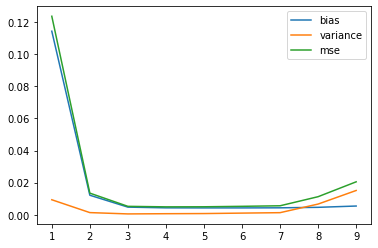

In [15]:
# Task 5

x_axis = range(1,10)
y_0 = biassq[0:9]
y_1 = var[0:9]
y_2 = mse[0:9]
plt.plot(x_axis,y_0)
plt.plot(x_axis,y_1)
plt.plot(x_axis,y_2)
plt.legend(['bias','variance','mse'])
plt.show()